<a href="https://colab.research.google.com/github/wojwozniak/university/blob/master/Machine_Learning/List01/List01Task03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem 3 of [first UWr_ML_2024 homework](https://github.com/wojwozniak/university/blob/master/Machine_Learning/List01/Homework_1.pdf)

In this task, you will generate n = 10, 000 samples from a 2D Gaussian distribution and apply the k-means
algorithm to cluster the data into k = 3 clusters. You will calculate the average of the centroid norms and
analyze how the cumulative average converges over multiple iterations. The goal is to empirically estimate
the number of iterations required to achieve a stable result with 9-digit accuracy.

## Steps 1 - 4
We will need to do steps 1-4 many times so i will create a function doing those 4 steps


### Step 1
Generate n = 10000 samples (xi1, xi2) from a 2D Gaussian distribution.
### Step 2
Apply the k-means clustering algorithm with k = 3
### Step 3
For each centroid (Cj1, Cj2), j = 1, 2, 3, calculate its norm: ∥Cj∥ =q(Cj1)2 + (Cj2)2.
### Step 4
 Average the norms of the three centroids and call this value R1

In [17]:
import numpy as np
from sklearn.cluster import KMeans

np.random.seed(42) # Set seed for predictability

def getRValue():
    # Step 1: Generate points
    mean = [0, 0] # Basically a center point for Gaussian distribution
    cov = [[1, 0], [0, 1]] # Covariance matrix - points are completely unrelated
    n = 10000 # We need 10000 samples

    # Generate 10000 points around 0,0 that are completely unrelated to each other
    samples = np.random.multivariate_normal(mean, cov, n)

    # Step 2: Apply the k-means clustering algorithm with k = 3
    k = 3
    kmeans = KMeans(n_clusters = k, random_state = 42)
    kmeans.fit(samples)

    # Step 3: For each centroid (Cj1, Cj2), j = 1, 2, 3,
    #         calculate its norm: ∥Cj∥ =q(Cj1)2 + (Cj2)2.
    centers = kmeans.cluster_centers_
    norms = np.linalg.norm(centers, axis = 1)
    # for ki in range(k):
        # print(f"Centroid C_{ki+1}: {centers[ki]}, Norm: {norms[ki]}")

    # Step 4: Average the norms of the three centroids and call this value R1.
    R1 = np.mean(norms)
    # print(f'Average of the norms (R1): {R1}')
    return R1


## Step 5 and 6

 - Repeat this process 88 times (or more) to get the values R1, R2, . . . , R88.
 -  Calculate the cumulative average of the Ri values as 1 n Pn i=1 Ri for n = 1, 2, . . . , 88 (or more).

In [24]:
n_runs = 88
R_values = []
cumulative_averages = []
for n in range(n_runs):
    value = getRValue()
    R_values.append(value)
    cumulative_avg = sum(R_values) / (n+1)
    cumulative_averages.append(cumulative_avg)
    # print(f"Iteration: {n}. Average: {value}, Cumulative_average: {cumulative_avg}")

Iteration: 0. Average: 1.0424413780149624, Cumulative_average: 1.0424413780149624
Iteration: 1. Average: 1.0280541639871996, Cumulative_average: 1.035247771001081
Iteration: 2. Average: 1.0329330731203756, Cumulative_average: 1.034476205040846
Iteration: 3. Average: 1.0326676628874842, Cumulative_average: 1.0340240695025056
Iteration: 4. Average: 1.0356353570828154, Cumulative_average: 1.0343463270185675
Iteration: 5. Average: 1.0290584134624814, Cumulative_average: 1.0334650080925532
Iteration: 6. Average: 1.042900859039509, Cumulative_average: 1.0348129867992613
Iteration: 7. Average: 1.0300024687741152, Cumulative_average: 1.0342116720461179
Iteration: 8. Average: 1.031224424927297, Cumulative_average: 1.0338797556995822
Iteration: 9. Average: 1.0373143845672466, Cumulative_average: 1.0342232185863485
Iteration: 10. Average: 1.0431441785407325, Cumulative_average: 1.035034214945838
Iteration: 11. Average: 1.048463064458544, Cumulative_average: 1.0361532857385634
Iteration: 12. Avera

## Step 7
Plot the cumulative averages and analyze how the value converges.

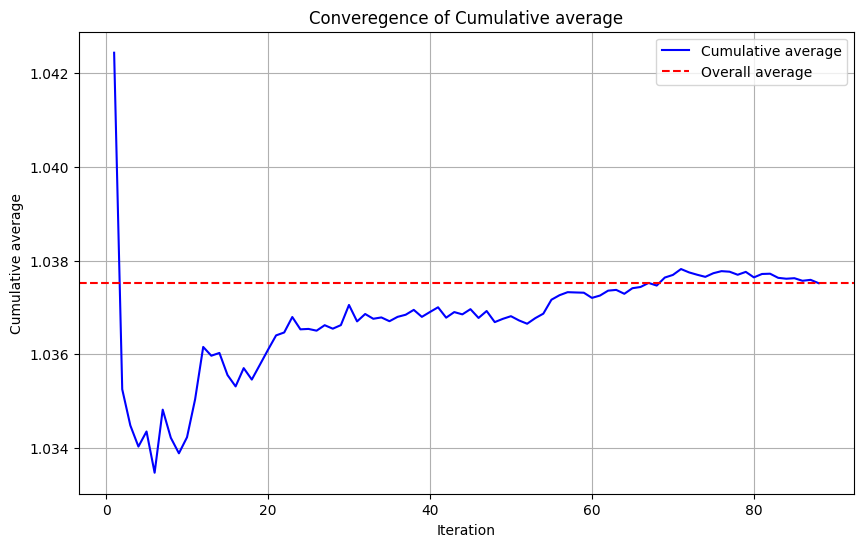

In [25]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(range(1, n_runs + 1), cumulative_averages, label="Cumulative average", color="blue")
plt.axhline(y=sum(R_values) / n_runs, label="Overall average", color="red", linestyle = "--")
plt.xlabel("Iteration")
plt.ylabel("Cumulative average")
plt.title("Converegence of Cumulative average")
plt.legend()
plt.grid(True)
plt.show()

## Final task:
Empirically estimate the number of iterations needed instead of 88 to achieve 9-digit accuracy
in the cumulative averages.

(TODO, does not work now)

In [39]:
def estimate_iterations_for_accuracy(tolerance=1e-9):
    R_values = []
    avg = 0
    iterations = 0
    previous_avg = None
    previous_error = 0

    while True:
        value = getRValue()
        R_values.append(value)
        iterations += 1

        if previous_avg is not None:
            avg = sum(R_values) / iterations
            error = abs(avg - previous_avg)
            error_diff = abs(error - previous_error)
            print(f"Iteration: {iterations}, Average: {avg}, Error: {error}, Error_diff: {error_diff}")

            if error < tolerance or error_diff < tolerance:
                break

            previous_error = error

        previous_avg = value

    return iterations, avg

iterations_needed, avg = estimate_iterations_for_accuracy()
print(f"Iterations needed: {iterations_needed}, Average:{avg}")

Iteration: 2, Average: 1.042377437669416, Error: 0.004485240749734443, Error_diff: 0.004485240749734443
Iteration: 3, Average: 1.0390659898533212, Error: 0.007796688565829157, Error_diff: 0.0033114478160947147
Iteration: 4, Average: 1.039873604030495, Error: 0.007430509809363217, Error_diff: 0.0003661787564659402
Iteration: 5, Average: 1.0371717766291104, Error: 0.005124669932905945, Error_diff: 0.002305839876457272
Iteration: 6, Average: 1.037550136335302, Error: 0.011185669311729818, Error_diff: 0.0060609993788238725
Iteration: 7, Average: 1.035735964092591, Error: 0.003705970773669076, Error_diff: 0.007479698538060742
Iteration: 8, Average: 1.0370979484039862, Error: 0.01224701776766235, Error_diff: 0.008541046993993273
Iteration: 9, Average: 1.0368129033161262, Error: 0.009818935267627005, Error_diff: 0.0024280825000353445
Iteration: 10, Average: 1.037084222849479, Error: 0.002551680236231535, Error_diff: 0.00726725503139547
Iteration: 11, Average: 1.0371849414302807, Error: 0.0023

KeyboardInterrupt: 